Both Ridge and Lasso regressions are used to prevent overfitting and multi-colllinearity of the dataset and aiming for smaller values of the coefficients to get a generalized model which have low variance and low bias.

Lasso is also capable of feature selection.

The key difference is in how they assign penalties to the coefficients:

Ridge Regression:
Performs L2 regularization, i.e., adds penalty equivalent to the square of the magnitude of coefficients
Minimization objective = LS Obj + α * (sum of square of coefficients)
Lasso Regression:
Performs L1 regularization, i.e., adds penalty equivalent to the absolute value of the magnitude of coefficients
Minimization objective = LS Obj + α * (sum of the absolute value of coefficients)

Loading Housing Pricing dataset

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd

In [2]:
df = load_boston()
df

/Users/rajatchauhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
# Setting up input variable, capital X (Vector of independent variables)

X = pd.DataFrame(df.data)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
# Renaming the column names to feature actual names

X.columns = df.feature_names
X

# Here we will be having 13 features model

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
# Defining the output variable

y = df.target
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# Ridge regression Algorithm

In [6]:
# Doing train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

X_train

# Here X_train and y_train will be used to train the data and X_test and y_test will be used to test the data, how 
# good the algorithm is working

# test size we have set up as 30 percent of the data will go for training of the model randomly
# random_state is a random number which selects the train data randomly.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


Standardization, also known as z-score normalization, is a data preprocessing technique commonly used in statistics and machine learning to rescale a variable's values to have a mean of 0 and a standard deviation of 1. It is typically applied when you have multiple variables with different scales, and you want to ensure that they all contribute equally to a model's analysis.

However, when you have only one variable, standardization may not be necessary or useful because there are no other variables to compare it to. Standardization becomes valuable when you have multiple variables because it helps ensure that each variable's scale doesn't disproportionately influence the results of your analysis, particularly in algorithms that are sensitive to the scale of variables (e.g., gradient descent in machine learning).

In the case of a single variable, the decision to standardize depends on your specific analysis goals and the nature of the data. If the variable already has a meaningful and interpretable scale, or if you don't plan to compare it to other variables, you may not need to standardize it.

However, if you want to make the variable's values more interpretable or if you think it might be compared to other variables in the future, you can still standardize it. In this case, the mean will become 0, and the standard deviation will become 1, but this might not have a significant impact on your analysis when there's only one variable. It's generally a good practice to document any preprocessing steps you apply to your data, including standardization, to make your analysis more transparent and reproducible.

In [7]:
# Doing standarization of the input variable

## standarization of the input variables

from sklearn.preprocessing import StandardScaler

# intializing the scaler to a variable

scaler = StandardScaler()

# which essentially also called as z-score normalization

# scaling the training data independent variables

X_train = scaler.fit_transform(X_train)
X_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [8]:
X_test = scaler.transform(X_test)
X_test 

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

fit_transform() is used on the training data to learn the scaling or transformation parameters and then applies the same transformation to the training data. transform() is used on new data (e.g. test data) to apply the same transformation that was learned on the training data.

Importing ridge library

In [9]:
from sklearn.linear_model import Ridge
# module for doing cross validation or hyper parameter tuning
from sklearn.model_selection import GridSearchCV

We will be doing hyper parameter tuning using GridSearchCV for the alpha parameter of the ridge, i.e. we will try to find the best parameter for our model

In [10]:
# Creating a ridge regressor object
ridge_reg_model = Ridge()

In [11]:
# The first parameter in ridge regression is alpha, to find out the best suitable value of alpha we will do this:

parameters = {'alpha': [1,2,5,10,20,30,40,50,60,70,80,90]}

ridgecv = GridSearchCV(ridge_reg_model,parameters,scoring = 'neg_mean_squared_error', cv = 5 )

ridgecv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [12]:
# ridgecv will give us the best parameter
print(ridgecv.best_params_)

{'alpha': 10}


In [13]:
# getting the best mean square error

print(ridgecv.best_score_)

-25.807228822291467


In [14]:
# Using this value of alpha = 10
# Creating a ridge regressor object
ridge_reg_model = Ridge(alpha = 10)


In [15]:
ridge_reg_model.fit(X_train, y_train)

Ridge(alpha=10)

In [16]:
print(f"intercept: {ridge_reg_model.intercept_}")
print(f"slope: {ridge_reg_model.coef_}")

intercept: 23.015819209039563
slope: [-1.00863113  0.65367126  0.13011532  0.85563487 -1.49397357  2.9537045
 -0.31502793 -2.59325927  1.49269132 -0.95371712 -1.95525142  0.99807142
 -3.74953233]


In [17]:
y_ridge_pred = ridge_reg_model.predict(X_test)
y_ridge_pred

array([28.4134954 , 36.07453577, 16.17164021, 25.30868069, 18.80946202,
       23.13610281, 17.61393934, 14.38360489, 22.53627218, 20.76952254,
       24.66003705, 18.89604804, -6.22947589, 21.96166951, 19.30921109,
       25.85720057, 19.58612918,  5.69547314, 39.88738352, 17.56727832,
       27.14663855, 29.65696101, 11.44350098, 24.11125603, 17.95711934,
       15.57428959, 23.12734966, 14.75101298, 22.43522694, 19.54923792,
       21.98108708, 25.21097849, 25.13554702, 18.36676527, 16.33620525,
       17.94437716, 30.95709893, 20.30635001, 24.04235565, 24.83020506,
       14.25723626, 31.13073416, 41.6638407 , 17.98419612, 27.01273195,
       17.01890841, 14.15348536, 26.05436703, 19.99814799, 30.25499968,
       21.54267256, 33.72177452, 16.00637844, 26.24691138, 38.87355943,
       22.75281202, 18.90407683, 32.36945892, 24.89966226, 13.35872194,
       22.91082359, 30.60280217, 31.24730093, 16.556512  , 22.02834711,
       16.75198858, 20.20417162, 26.06542713, 30.62889806, 12.09

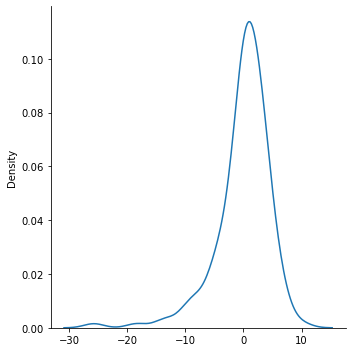

In [18]:
import seaborn as sns

sns.displot(y_ridge_pred - y_test, kind = 'kde')

In [19]:
from sklearn.metrics import r2_score
R2 = r2_score( y_test, y_ridge_pred)
R2

0.7072830902371282

In [20]:
# number of data points or observations

n = len(X_train)
n

354

In [21]:
# number of independent variables in the model

k = 13

In [22]:
Adjusted_R2 = 1 - ((1-R2)*(n-1)/(n-k-1))
Adjusted_R2

0.696090973099136

# Lasso Regression

Lasso Regression also helps in reducing overfitting and reducing multi collinearity,
But apart from that it helps in feature selection as it can make the slopes equal to zero.

It adds a penalty term which is the absolute values of slopes or coefficients of the features

In [23]:
from sklearn.linear_model import Lasso

In [24]:
lasso = Lasso()

The dataset is already being divided into train and test split

and also standarisation of data have already been done by standard scaler.

So we will use the results directly

In [25]:
# here also we need to get the parameter

# The first parameter in ridge regression is alpha, to find out the best suitable value of alpha we will do this:

parameters = {'alpha': [1,2,5,10,20,30,40,50,60,70,80,90]}

lassocv = GridSearchCV(lasso,parameters,scoring = 'neg_mean_squared_error', cv = 5 )

lassocv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [26]:
print(lassocv.best_params_)

{'alpha': 1}


In [27]:
print(lassocv.best_score_)

-31.153603752119


In [28]:
# Using this value of alpha = 1
# Creating a lasso regressor object

lasso = Lasso(alpha = 1)

In [29]:
lasso.fit(X_train, y_train)

Lasso(alpha=1)

In [30]:
print(f"intercept: {lasso.intercept_}")
print(f"slope: {lasso.coef_}")

intercept: 23.01581920903957
slope: [-0.          0.         -0.          0.22497382 -0.          2.73102016
 -0.         -0.         -0.         -0.         -1.24748188  0.26711155
 -3.75408325]


Wow this regressor have just removed so many features assigning them a zero slope.

Like this it is capable of feature selection

In [31]:
y_lasso_pred = lasso.predict(X_test)
y_lasso_pred

array([26.12212011, 30.64819603, 17.74859418, 25.19460935, 19.2946692 ,
       22.82279099, 18.29163625, 14.64075609, 21.39330664, 20.41184791,
       20.63763155, 21.04309429,  1.20212245, 22.48770149, 20.32863075,
       24.82509724, 18.13265187,  6.81250853, 36.09245901, 18.45054869,
       25.64506153, 26.80170403, 13.73714037, 24.01576341, 18.81760059,
       15.4264936 , 22.86865424, 19.00799481, 19.78638284, 19.64740851,
       19.93060152, 25.47637139, 25.2188929 , 19.46825782, 15.87043757,
       20.50660407, 31.02198968, 21.6519024 , 21.52470923, 24.76908959,
       14.39002311, 27.57471172, 36.56725739, 19.58680457, 25.573017  ,
       17.1872521 , 15.93361988, 25.87675365, 19.35466887, 29.59665087,
       23.11788464, 31.50427155, 17.53234012, 25.85419661, 35.21484659,
       22.89869915, 19.39011084, 29.39749368, 24.66544216, 16.65559649,
       25.47892536, 30.80725782, 28.94063044, 18.30751821, 27.60126279,
       14.37892853, 20.05681263, 25.59068988, 28.35700042, 16.00

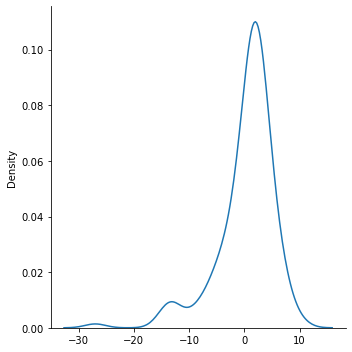

In [32]:
import seaborn as sns

sns.displot(y_lasso_pred - y_test, kind = 'kde')

In [33]:
from sklearn.metrics import r2_score
R2 = r2_score( y_test, y_lasso_pred)
R2

0.6439219427114921

In [34]:
# number of data points or observations

n = len(X_train)
n

354

In [35]:
# number of independent variables in the model

k = 13

In [36]:
Adjusted_R2 = 1 - ((1-R2)*(n-1)/(n-k-1))
Adjusted_R2

0.6303071934622255

We observe ridge regressor have more R^2 and adjusted R^2 values than the lasso regressor.